In [81]:
#import the libraries for data wrangling and visualizations
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os 

In [82]:
parentdir = os.path.normpath(os.path.join(os.getcwd(), os.pardir)) # goes to CarbonCast folder
#print(parentdir)
fuel_dir = os.path.normpath(os.path.join(parentdir, f"./DE/fuel_forecast"))
#print(fuel_dir)


In [83]:
#read the csv file 
source_list = ['coal','nat_gas','wind']
df_ANN = {}
for source in source_list: 
    df_path = os.path.join(fuel_dir,f'DE_ANN_{source}_iter0.csv')
    #print(df_path)
    df_ANN[source] = pd.read_csv(df_path)
    

In [84]:
#check if there are missing values and the dtypes 
for source in source_list:
    if (df_ANN[source].values == 0.0).any():
        print(f'The {source} contains 0s')
    else: 
        print(f'The values of {source} are valid')
    print(df_ANN[source].isnull().sum())
    print(df_ANN[source].dtypes)


The values of coal are valid
datetime                        0
coal_actual                     0
avg_coal_production_forecast    0
dtype: int64
datetime                         object
coal_actual                     float64
avg_coal_production_forecast    float64
dtype: object
The values of nat_gas are valid
datetime                           0
nat_gas_actual                     0
avg_nat_gas_production_forecast    0
dtype: int64
datetime                            object
nat_gas_actual                     float64
avg_nat_gas_production_forecast    float64
dtype: object
The values of wind are valid
datetime                        0
wind_actual                     0
avg_wind_production_forecast    0
dtype: int64
datetime                         object
wind_actual                     float64
avg_wind_production_forecast    float64
dtype: object


There are no missing datas, but the datetime is object. We will need to convert it to datetime

In [85]:
#convert the time to datetime 
for source in source_list:
    df_ANN[source]['datetime'] = pd.to_datetime(df_ANN[source]['datetime'])
    df_ANN[source].set_index('datetime', inplace=True) 
    #check if it was convert successfully
    print(df_ANN[source].dtypes)

coal_actual                     float64
avg_coal_production_forecast    float64
dtype: object
nat_gas_actual                     float64
avg_nat_gas_production_forecast    float64
dtype: object
wind_actual                     float64
avg_wind_production_forecast    float64
dtype: object


### COAL

In [86]:
#obtain a basic data profile of coal 
df_ANN['coal'].describe()

,coal_actual,avg_coal_production_forecast
count,140256.000000,140256.000000
mean,62983.355044,65458.016392
std,26157.001531,22744.255375
min,14638.000000,10501.885380
25%,41257.000000,47700.049103
50%,62833.500000,63591.804835
75%,83161.250000,79382.205065
max,131715.000000,161386.412050


#### COAL (test vs train)

In [87]:
#split the data into training and testing set
def train_test_split(df):
    train_split = df.iloc[df.index < '2023-07-01']
    test_split = df.iloc[(df.index >= '2023-07-01') & (df.index <= '2023-12-31')]
    return train_split, test_split

coal_train,coal_test = train_test_split(df_ANN['coal'])


In [88]:
#obtain a data profile of the training and testing set
print(coal_train.describe())
print(coal_test.describe())

         coal_actual  avg_coal_production_forecast
count  122448.000000                 122448.000000
mean    64990.743581                  67294.301473
std     25685.061359                  22870.816245
min     14748.000000                  12575.622490
25%     44498.000000                  49728.336982
50%     65515.500000                  65543.625410
75%     84442.750000                  81329.088928
max    131715.000000                 161386.412050
         coal_actual  avg_coal_production_forecast
count   17572.000000                  17572.000000
mean    49541.209310                  52855.770571
std     25156.895449                  17205.423369
min     14638.000000                  10501.885380
25%     28990.000000                  39118.920108
50%     42607.000000                  50733.692155
75%     65399.000000                  64088.438267
max    115790.000000                 109167.629750


Based on the statistics we can see that for the training and testing data, the standard deviations are roughly similar. However, values like the mean, median, and max are significantly higher for the training data. Additionally, at a quick glimpse, the training data prediction is closer compare to the testing

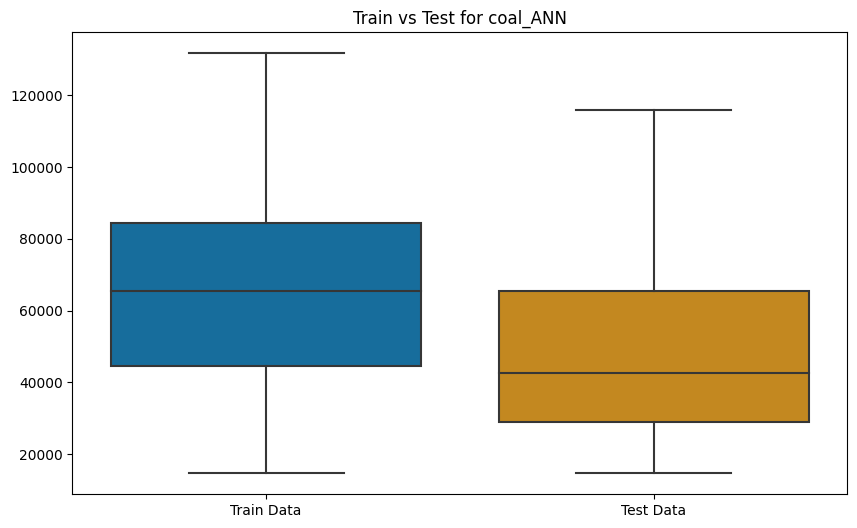

In [89]:
#create a boxplot to visualize the data distribution
def create_boxplots(actual,source):
    #create the boxplots to visualize the differences better
    fig, ax = plt.subplots(figsize=(10, 6))

    #make it colorblind friendly and plot the two sets
    color = sns.color_palette('colorblind',2)
    plt.style.use('tableau-colorblind10')
    sns.boxplot(data=[train[f'{source}_actual'], test[f'{source}_actual']], palette=color)
    ax.set_xticklabels(['Train Data', 'Test Data'])
    ax.set_title(f'Train vs Test for {source}_ANN')
    plt.show()

#run the boxplot
create_boxplots(coal_train,coal_test,'coal')

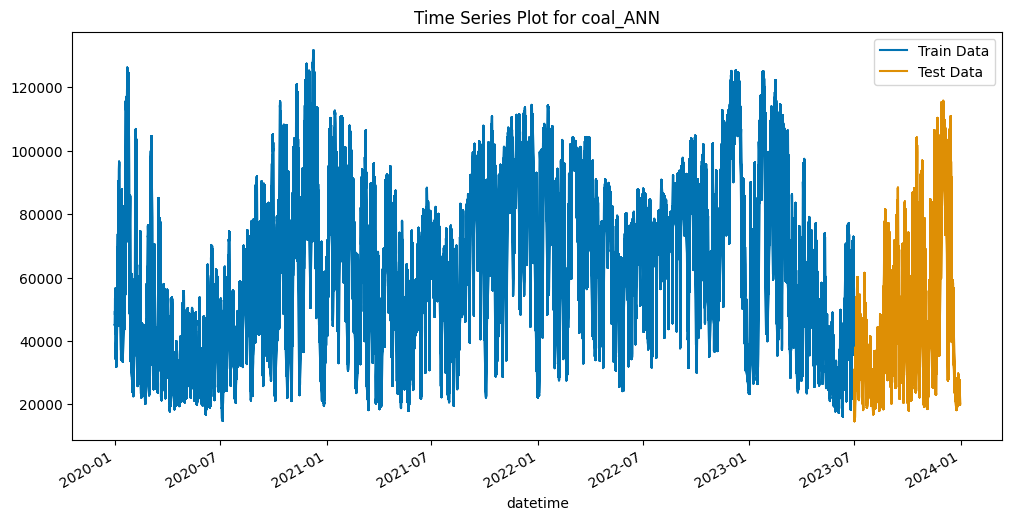

In [103]:
#create a time series plot to visualize data distribution
def create_time_series(train,test,source): 
    #create a time series comparisions of the actual data for train and test
    fig, ax = plt.subplots(figsize=(12, 6))
    color = sns.color_palette('colorblind', 2)
    train[f'{source}_actual'].plot(ax=ax, label='Train Data', color=color[0])
    test[f'{source}_actual'].plot(ax=ax, label='Test Data', color=color[1])
    ax.set_title(f'Time Series Plot for {source}_ANN')
    ax.legend()
    plt.show()

#run the time series plot
create_time_series(coal_train,coal_test,'coal')

Based on both the boxplot and time series, we will notices that the test data typically has lower values compared to the training data. The starting values fore each of the two datasets are similar w/o minimal differences. However, the maximum values for training data are higher than the maximum for testing data.

#### COAL (forecast vs actual)

#### Years, Months, Days

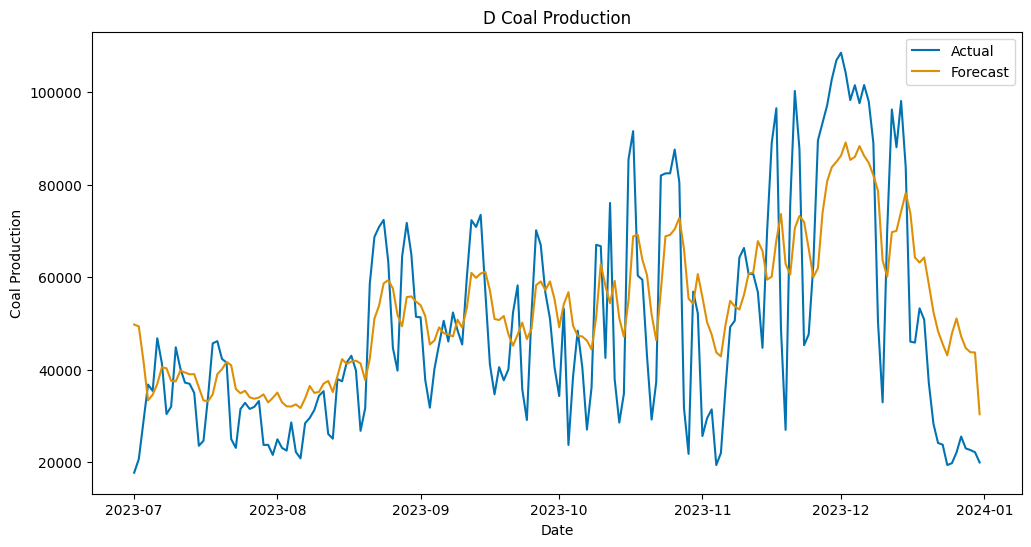

/var/folders/_c/cb9tn8qn70v6ly2nt8vzyrr40000gn/T/ipykernel_36906/1339158474.py:9: FutureWarning: 'SM' is deprecated and will be removed in a future version, please use 'SME' instead.
  resampled_df = df.resample(freq).mean()


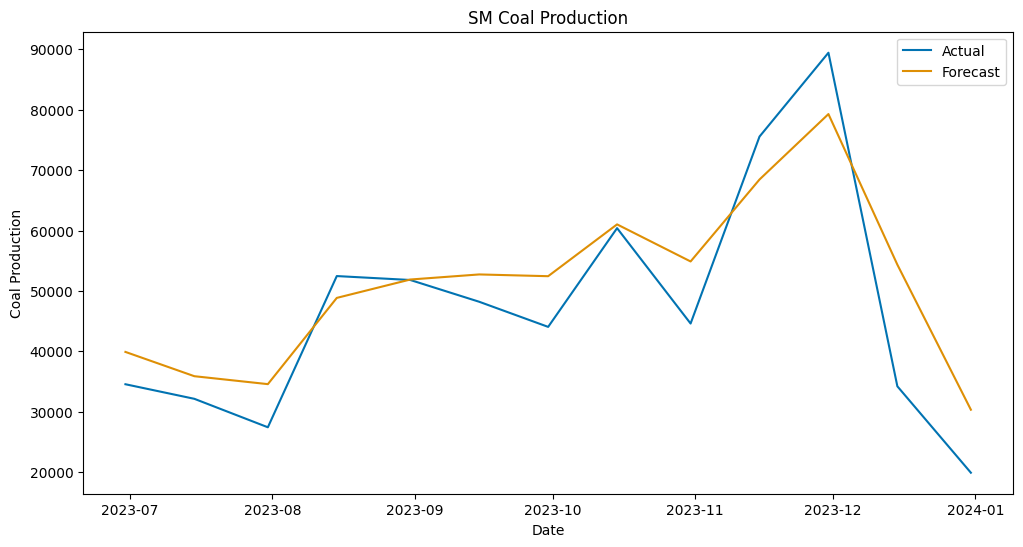

/var/folders/_c/cb9tn8qn70v6ly2nt8vzyrr40000gn/T/ipykernel_36906/1339158474.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = df.resample(freq).mean()


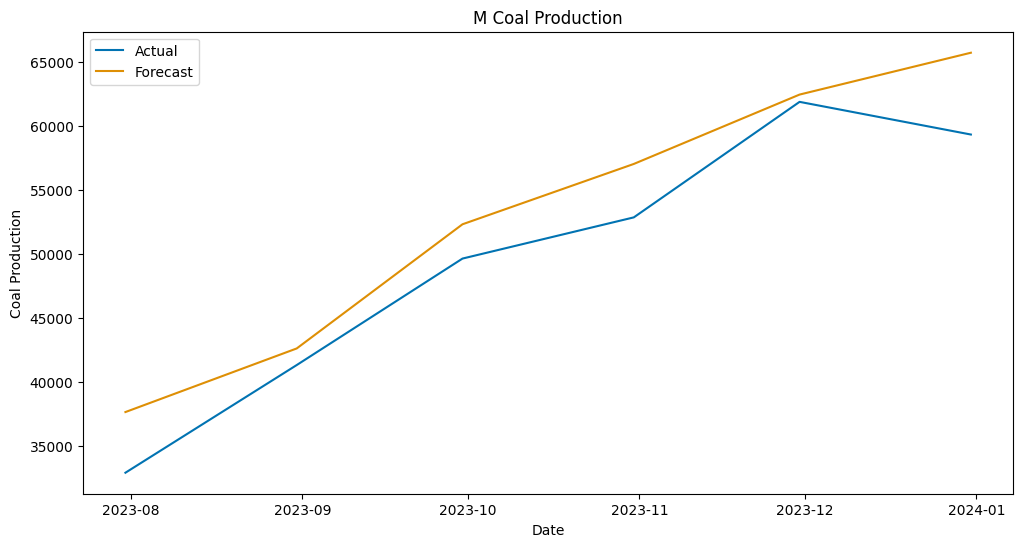

/var/folders/_c/cb9tn8qn70v6ly2nt8vzyrr40000gn/T/ipykernel_36906/1339158474.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resampled_df = df.resample(freq).mean()


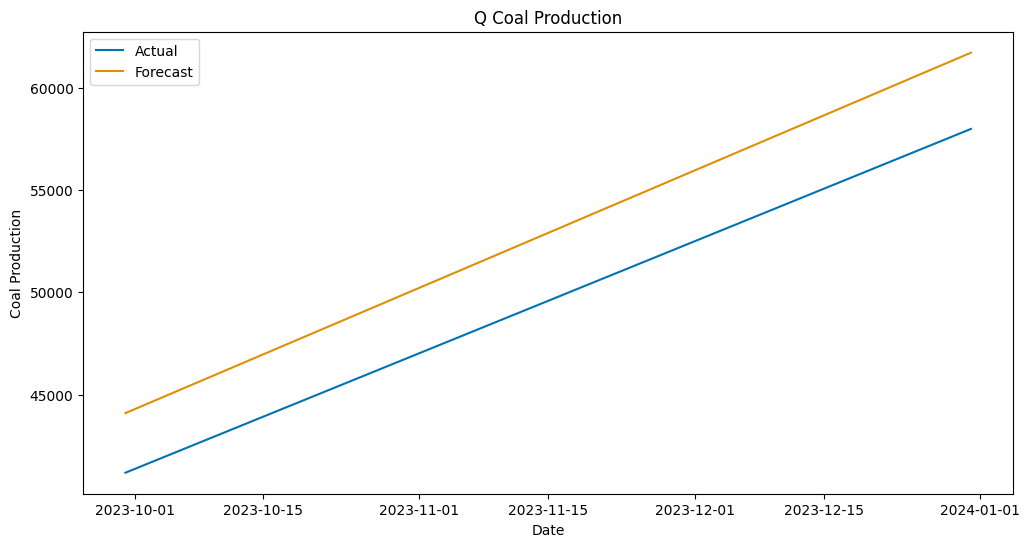

In [131]:
#create a function to plot the actual vs forecasts data
def plot_forecasts_vs_actual(df, actual_col, forecast_col, source, frequencies=['D','SM','M','Q']):
    #create colorblind friendly schema
    plt.style.use('tableau-colorblind10')
    colors = sns.color_palette('colorblind', 2)

    #iterated through the frequenices and plot the graphs 
    for freq in frequencies:
        resampled_df = df.resample(freq).mean()
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(resampled_df.index, resampled_df[actual_col], label='Actual', color=colors[0])
        ax.plot(resampled_df.index, resampled_df[forecast_col], label='Forecast', color=colors[1])
        ax.set_title(f'{freq} {source} Production')
        ax.set_xlabel('Date')
        ax.set_ylabel('Coal Production')
        ax.legend()
        plt.show()

plot_forecasts_vs_actual(coal_test,'coal_actual','avg_coal_production_forecast','Coal')
#note that D means Daily, SM means semi-monthly, M means monthly, Q means Quarterly

Based on the forecasts plot, even though the MAPE score is high, we could see that the trend for the forecast and actual are similar to each other. The Daily, Monthly, and Quarterly exists the most similarity in trends, with semi-monthly underperforming. Since we focus on 96-hr prediction, this is a good sign, since it tell us that the model predict the trend well. 

### NAT_GAS

In [132]:
#obtain a basic data profile of nat_gas 
df_ANN['nat_gas'].describe()

,nat_gas_actual,avg_nat_gas_production_forecast
count,140256.000000,140256.000000
mean,22531.271332,24845.945128
std,11359.891150,7499.060171
min,4536.000000,4322.867100
25%,13386.750000,19542.137543
50%,20152.500000,24304.338000
75%,29992.448770,29592.629105
max,66154.000000,60360.408920


#### NAT_GAS (test vs train)

In [133]:
#split the data into training and testing
nat_gas_train, nat_gas_test = train_test_split(df_ANN['nat_gas'])
nat_gas_train, nat_gas_test #check if the data was split correctly 


(                     nat_gas_actual  avg_nat_gas_production_forecast
 datetime                                                            
 2020-01-01 00:00:00         18169.0                      21772.64482
 2020-01-01 01:00:00         17474.0                      21361.05556
 2020-01-01 02:00:00         17554.0                      21229.36122
 2020-01-01 03:00:00         17171.0                      21127.43875
 2020-01-01 04:00:00         17425.0                      21511.10007
 ...                             ...                              ...
 2023-06-30 19:00:00         27433.0                      30331.02890
 2023-06-30 20:00:00         26271.0                      29928.63103
 2023-06-30 21:00:00         22983.0                      29525.92995
 2023-06-30 22:00:00         19245.0                      29062.14321
 2023-06-30 23:00:00         13497.0                      28551.69595
 
 [122448 rows x 2 columns],
                      nat_gas_actual  avg_nat_gas_production

In [134]:
#obtain data profiles of the 2 new sets
print(nat_gas_train.describe())
print(nat_gas_test.describe())

       nat_gas_actual  avg_nat_gas_production_forecast
count   122448.000000                    122448.000000
mean     22486.990869                     25001.092162
std      11326.324650                      7587.607384
min       4536.000000                      4322.867100
25%      13349.000000                     19638.149525
50%      20163.000000                     24546.002465
75%      30130.000000                     29953.022252
max      60133.000000                     58447.334160
       nat_gas_actual  avg_nat_gas_production_forecast
count    17572.000000                     17572.000000
mean     22957.934327                     23793.669111
std      11603.295535                      6786.104985
min       6825.000000                      8335.675640
25%      13671.000000                     19118.280775
50%      20232.000000                     22811.846025
75%      29301.000000                     27264.274300
max      66154.000000                     60360.408920


Based on the statistics we could see that the mean, std, minimum, median, and maximum values are all very close to each other. We could assume that the data prediction will also be similar. We will verify this thought with several visualization and test later on. 

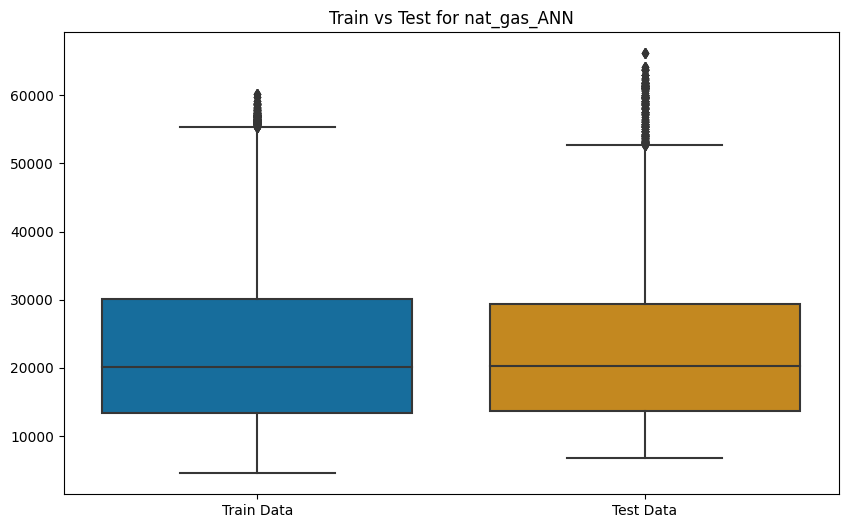

In [135]:
#plot the boxplots
create_boxplots(nat_gas_train,nat_gas_test,'nat_gas')

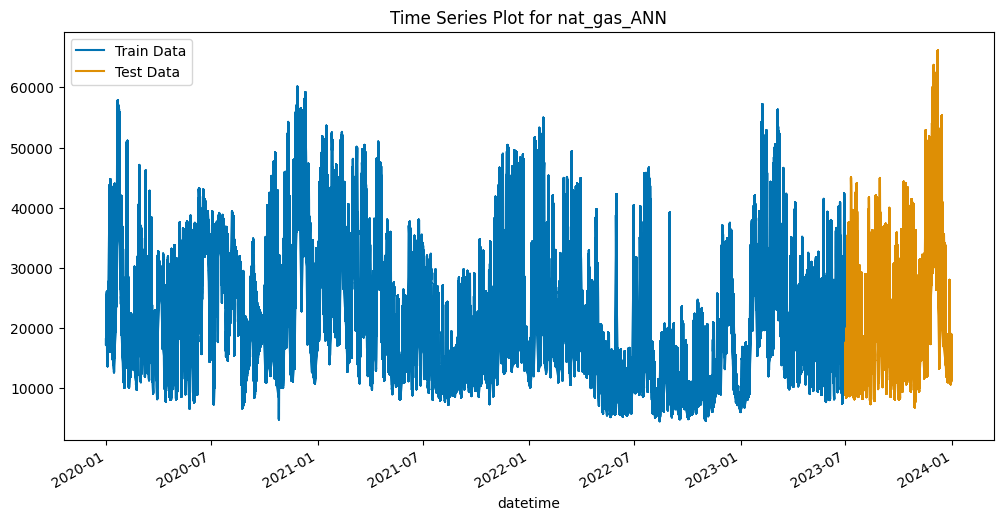

In [136]:
#plot the time series plot
create_time_series(nat_gas_train,nat_gas_test,'nat_gas')

The boxplot and time series plot both support that the data for the training and testing set are roughly similar to each other. However, for the testing data there appears to be several outliers indicated by the dots outside of the maximum. This might results in some discrepancies in the predictions. We will take a look to determine the reason behind the outliers.

The reason behind the outliers is that after Germany turn off their nuclear power plant, they now turn to gas-fired plants which lead to an increase in the natural gas production

https://www.iea.org/countries/germany/natural-gas#where-does-germany-get-its-natural-gas

#### NAT_GAS (forecast vs actual)

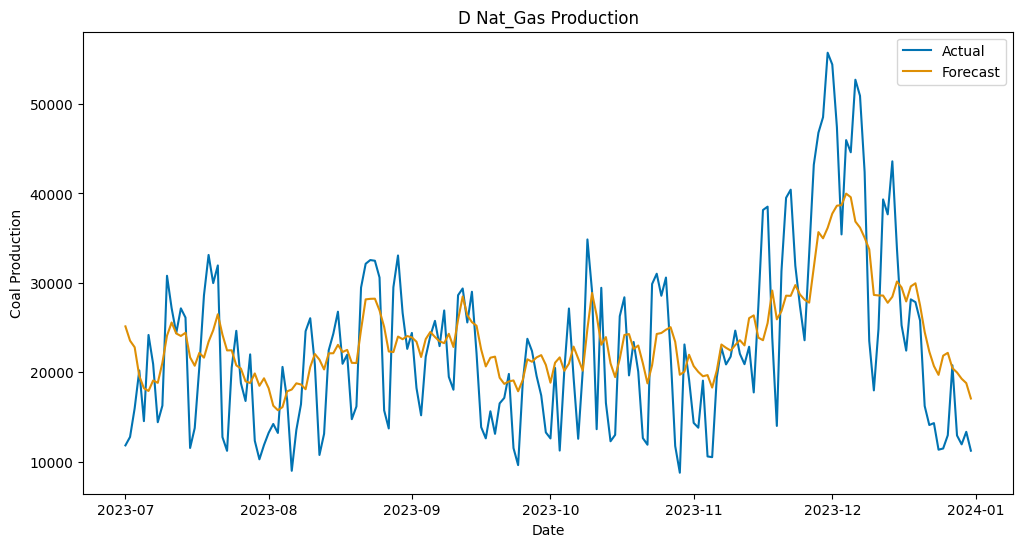

/var/folders/_c/cb9tn8qn70v6ly2nt8vzyrr40000gn/T/ipykernel_36906/1339158474.py:9: FutureWarning: 'SM' is deprecated and will be removed in a future version, please use 'SME' instead.
  resampled_df = df.resample(freq).mean()


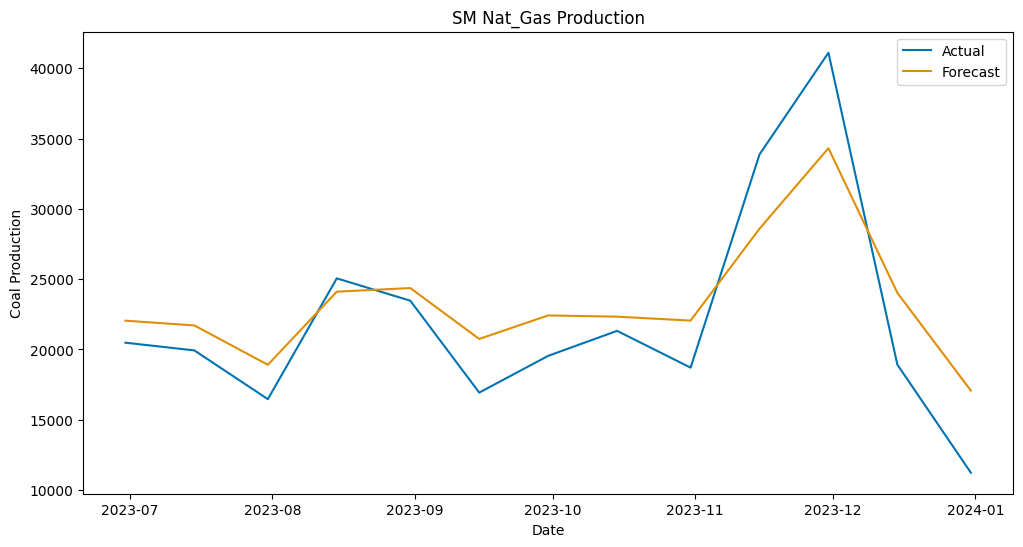

/var/folders/_c/cb9tn8qn70v6ly2nt8vzyrr40000gn/T/ipykernel_36906/1339158474.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = df.resample(freq).mean()


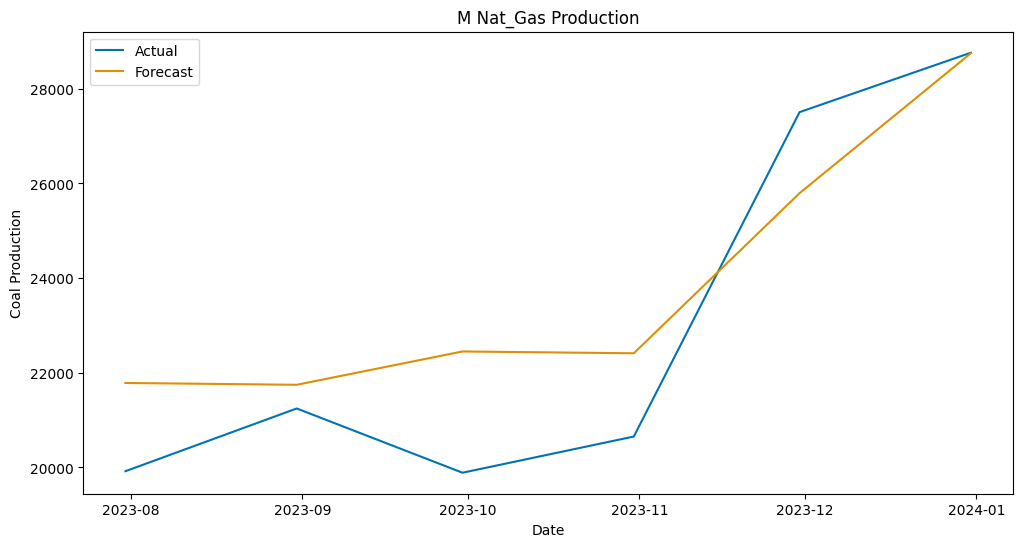

/var/folders/_c/cb9tn8qn70v6ly2nt8vzyrr40000gn/T/ipykernel_36906/1339158474.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resampled_df = df.resample(freq).mean()


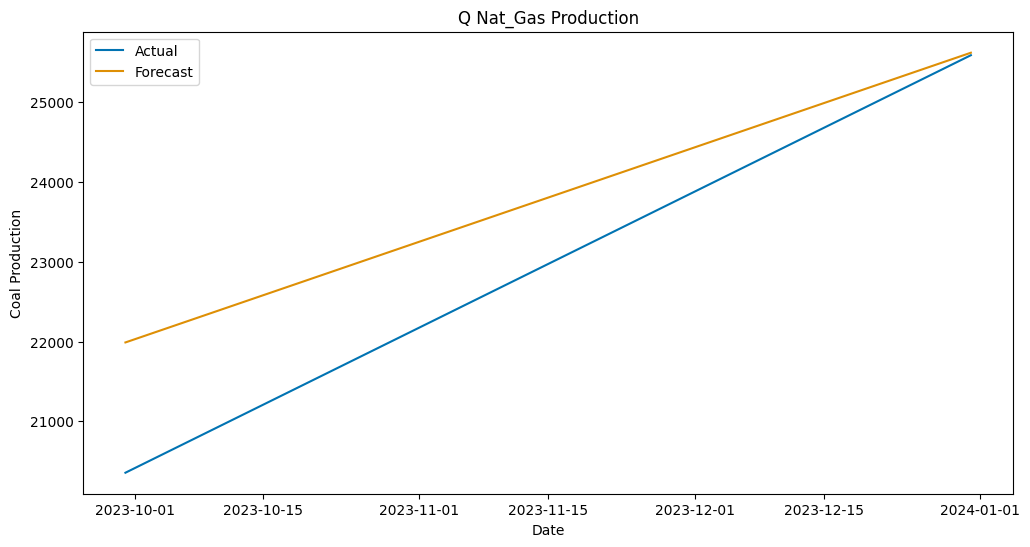

In [145]:
#plot the forecast vs actual for 4 different frequencies
plot_forecasts_vs_actual(nat_gas_test,'nat_gas_actual','avg_nat_gas_production_forecast','Nat_Gas')


The forecasts plot for Nat_Gas follows the same story as the one for coal. The trends for forecast and actual are similar to each other for daily, semi-monthly, and quarterly. This time the monthly trend is slightly underperforming as it does not capture the trend as well as the other three frequencies. Even though the values are different, the trends are capture for the daily which is a good sign for 96-hr forecasts. 

### WIND

In [146]:
#obtain a basic data profile of wind 
df_ANN['wind'].describe()

,wind_actual,avg_wind_production_forecast
count,140256.000000,140256.000000
mean,58542.751289,52783.706683
std,43552.324298,30751.042503
min,517.000000,979.000000
25%,22940.750000,31106.604097
50%,46741.000000,46006.425250
75%,86376.250000,66356.181455
max,239195.000000,235398.004440


#### WIND (test vs train)

In [147]:
#split the data into training and test
wind_train, wind_test = train_test_split(df_ANN['wind'])
wind_train, wind_test

(                     wind_actual  avg_wind_production_forecast
 datetime                                                      
 2020-01-01 00:00:00      28078.0                   27588.00050
 2020-01-01 01:00:00      29628.0                   29918.00093
 2020-01-01 02:00:00      30162.0                   31810.00043
 2020-01-01 03:00:00      31211.0                   32259.99909
 2020-01-01 04:00:00      31223.0                   31073.99999
 ...                          ...                           ...
 2023-06-30 19:00:00      18156.0                   12093.00004
 2023-06-30 20:00:00      21707.0                   13356.00005
 2023-06-30 21:00:00      29584.0                   16777.99926
 2023-06-30 22:00:00      35358.0                   28596.99908
 2023-06-30 23:00:00      43354.0                   34274.99845
 
 [122448 rows x 2 columns],
                      wind_actual  avg_wind_production_forecast
 datetime                                                      
 2023-07-0

In [148]:
#obtain data profiles of the 2 new sets
print(wind_train.describe())
print(wind_test.describe())

         wind_actual  avg_wind_production_forecast
count  122448.000000                 122448.000000
mean    57215.462105                  52386.229918
std     42648.390362                  30458.889328
min       517.000000                    979.000000
25%     22620.250000                  30558.262078
50%     45528.000000                  45921.335325
75%     83757.000000                  66116.473635
max    239195.000000                 235398.004440
         wind_actual  avg_wind_production_forecast
count   17572.000000                  17572.000000
mean    66764.167824                  55130.084937
std     47969.340613                  32499.923733
min       606.000000                   1193.999980
25%     25455.000000                  33671.211837
50%     55250.000000                  46146.826060
75%    102791.000000                  67279.953355
max    229762.000000                 232529.996230


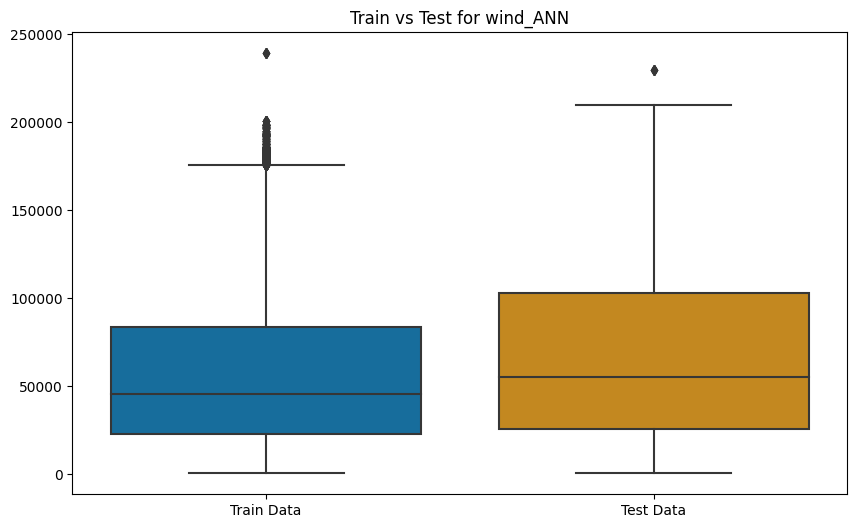

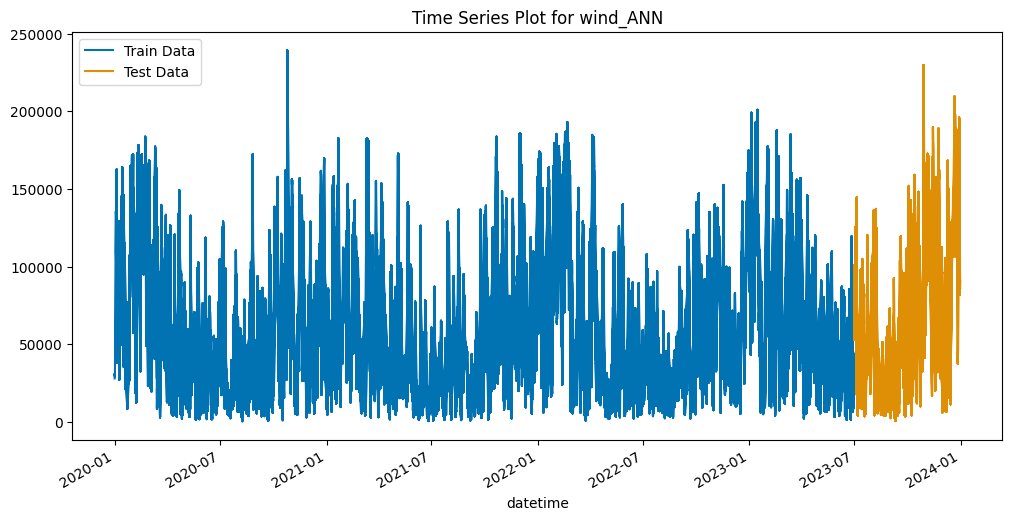

In [149]:
#plot the boxplots and time series plot 
create_boxplots(wind_train,wind_test,'wind')
create_time_series(wind_train,wind_test,'wind')

Based on the plots and summary statistics we could see that the training data has smaller values on average, with some outliers which could be explained by Germany's policy to be less reliant on Russian fossil fuels (reference below).This also explains why the values for the testing data are on the higher ends.


https://www.reuters.com/business/energy/germany-sees-jump-wind-installations-new-laws-hike-activity-2024-02-08/#:~:text=The%20sharp%20rise%20in%20Germany,reach%20115%20GW%20by%202030.

#### WIND (forecast vs actual)

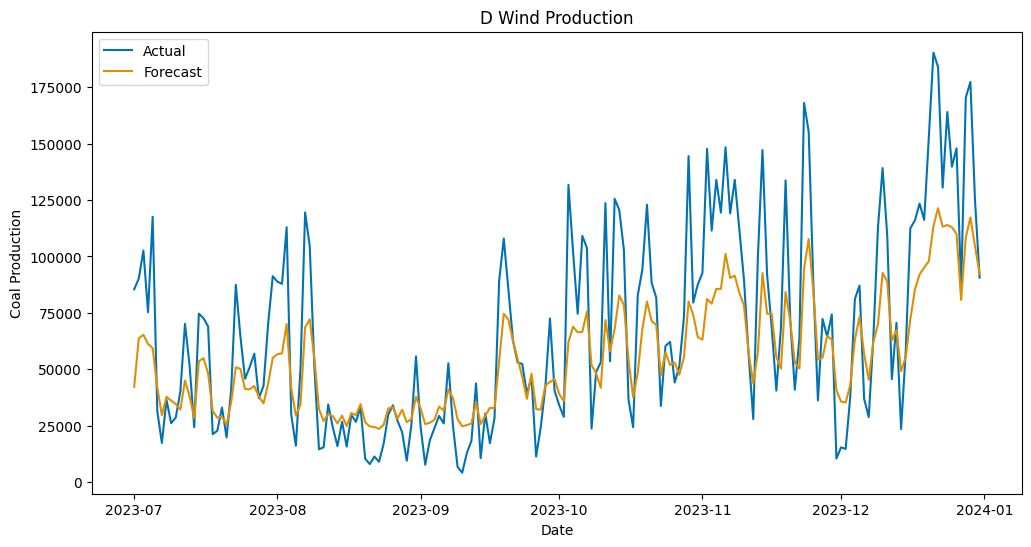

/var/folders/_c/cb9tn8qn70v6ly2nt8vzyrr40000gn/T/ipykernel_36906/1339158474.py:9: FutureWarning: 'SM' is deprecated and will be removed in a future version, please use 'SME' instead.
  resampled_df = df.resample(freq).mean()


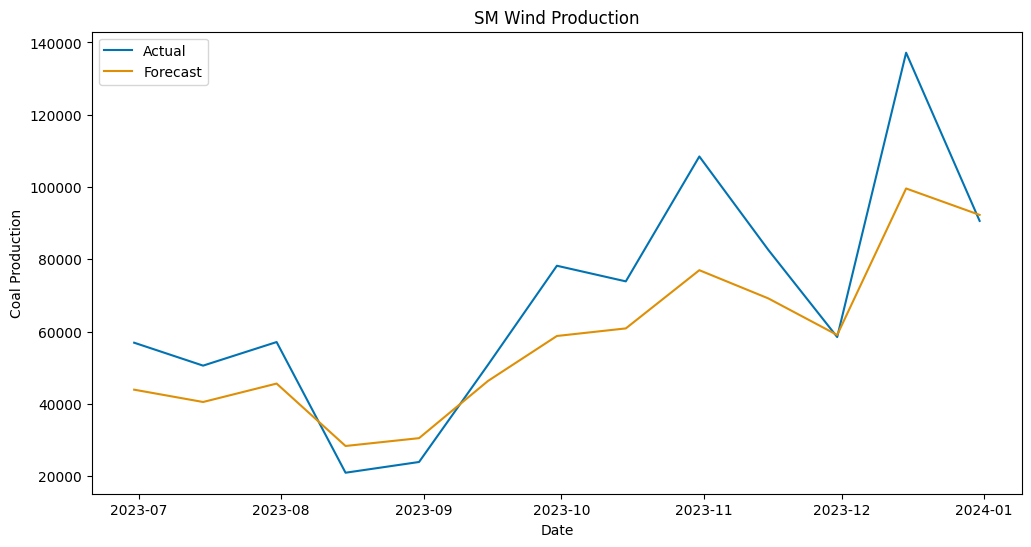

/var/folders/_c/cb9tn8qn70v6ly2nt8vzyrr40000gn/T/ipykernel_36906/1339158474.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = df.resample(freq).mean()


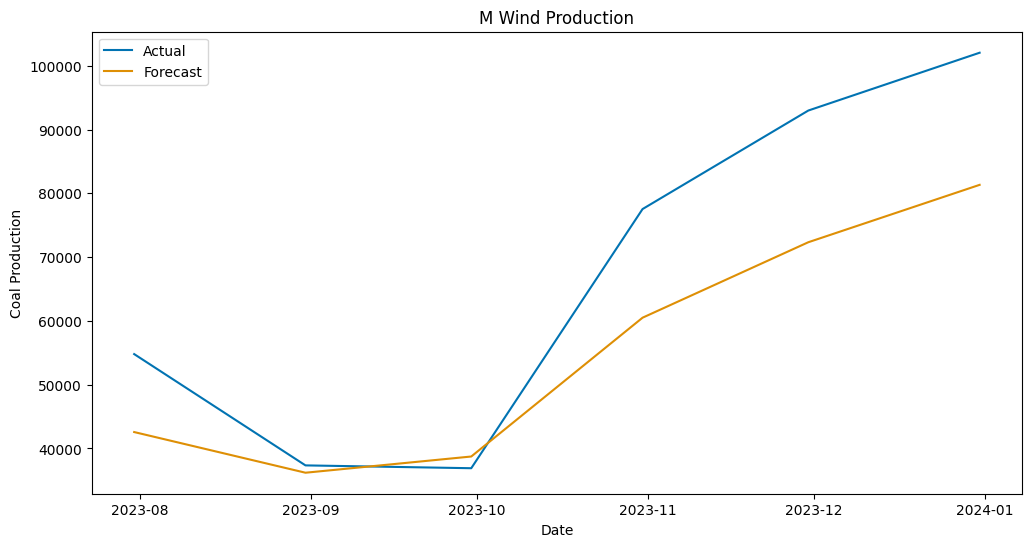

/var/folders/_c/cb9tn8qn70v6ly2nt8vzyrr40000gn/T/ipykernel_36906/1339158474.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resampled_df = df.resample(freq).mean()


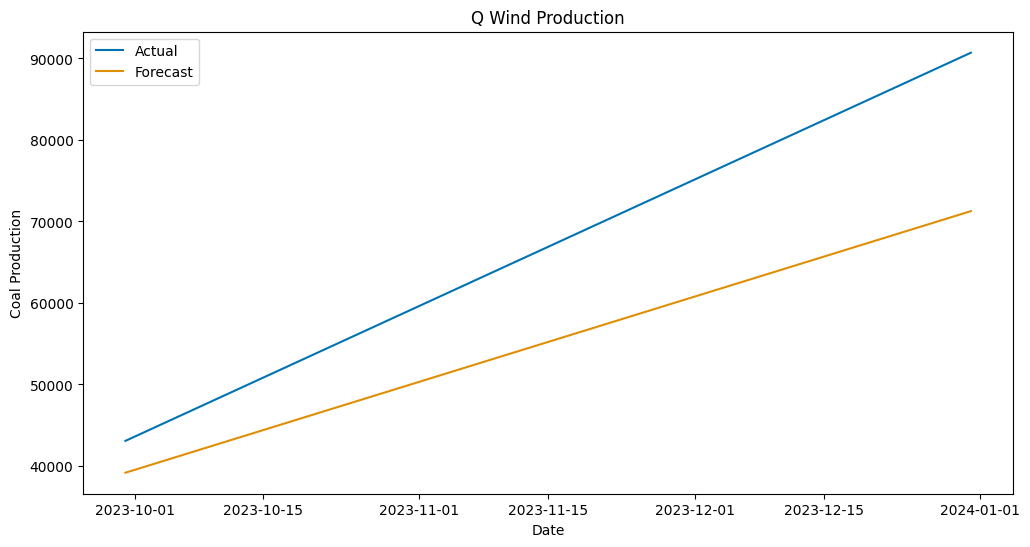

In [150]:
#plot the forecast vs actual for 4 different frequencies
plot_forecasts_vs_actual(wind_test,'wind_actual','avg_wind_production_forecast','Wind')


The forecast for wind follows the same trend and story, and perform better for all 4 frequencies compared to coal and nat_gas. The trends for the forecasts are capture, though the discrepancies is quite huge. We recommend the users to take caution and consideres the trends when we're looking at a 96-hr forecasts